# <p style="text-align:center;">Supervisado</p>

**Todo ejercicio debe tener un análisis fundamentado en la teoría vista en la materia, dicho análisis sera parte del informe a entregar en pdf**

<span style="color:blue">*Se recomienda hacer uso de las herramientas vistas en los demos de la materia.*</span>

**Objetivos:** 
- Implementar los modelos random forest y redes neuronales para clasificar las galaxias en tipo Elípticas y Espirales e Irregulares
- Comparar la performance obtenida con los modelos vistos en el anterior práctico y los nuevos modelos de este práctico.

# Paquetes necesarios 

# Data set

Se continua con el dataset previamente curado y usado en el anterior práctico. 
Las variables físicas que caracterizan a las galaxias son:
- **distancia_L**: Es la distancia a la galaxia, su calculo hace uso del brillo de la galaxia
- **Mag_abs**: Es el brillo que tendría la galaxia a una distancia fija (10 Mpc)
- **objID**: Es el id de las galaxias
- **rac y dec** = Posición angular, rac de 0 a 360 y dec de -90 a 90
- **modelMag_u,modelMag_g, modelMag_r,modelMag_i,modelMag_z**= Estas variables representan una fracción de la luz total que observamos de las galaxias según su frecuencia (como por ejemplo, la frecuencia de radio, para más información [wiki](https://es.wikipedia.org/wiki/Espectro_visible))
- **petroR90_r** = Es una medida del tamaño de la galaxia
- **color**= Como su nombre lo indica es el color más predominante en la galaxia
- **elíptica, espiral, irregular**= Estas columnas identifican el tipo de morfología de las galaxias. Si el valor de una de estas tres columnas es 1, entonces la galaxia tiene esa morfología y las dos restantes tendrán el valor 0. 



<span style="color:red">**Cargue el conjunto de datos obtenido en la parte1.**</span>  


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

# Target

Usen como Target la clase de tipo morfológico de las galaxias.

In [2]:
def galaxy_morf(row):
    if row["elliptical"]:
        return "E"
    elif row["spiral"]:
        return "S"
    else:
        return "I"
    
def num_type(row):
    if row["type"] == "I":
        return 1
    elif row["type"] == "S":
        return 2
    else:
        return 3

In [3]:
data = pd.read_csv('galaxias_2.csv') #usamos el dataset curado en el entregable 2
data.head(10)

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,Color,elliptical,spiral,uncertain,distancia_L,Mag_abs
0,1.237674e+18,119.822479,42.008528,17.36539,15.46586,14.54658,14.07490,13.69937,18.121160,-2.818807,1.0,0.0,0.0,135.131916,-21.191136
1,1.237674e+18,118.185239,33.699089,19.95136,18.35397,17.54043,17.05026,16.71222,3.657189,-2.410933,0.0,0.0,1.0,153.893111,-18.473102
2,1.237658e+18,129.109544,4.654070,17.07165,15.83995,15.33272,15.07332,14.92688,17.837670,-1.738927,0.0,1.0,0.0,84.249297,-19.301402
3,1.237674e+18,120.110719,42.078653,19.79620,17.75608,17.02625,16.65317,16.40043,7.058877,-2.769947,0.0,0.0,1.0,97.626611,-17.957224
4,1.237651e+18,122.677351,48.918774,18.47516,17.39154,16.99343,16.77378,16.65345,7.496475,-1.481728,0.0,0.0,1.0,119.172834,-18.383764
5,1.237658e+18,122.189022,37.330341,19.01056,17.81912,17.38598,17.09107,16.96071,7.394811,-1.624582,0.0,0.0,1.0,126.403332,-18.125019
6,1.237658e+18,125.727647,4.312471,19.62410,17.80488,17.01490,16.59137,16.47210,4.984677,-2.609200,0.0,0.0,1.0,85.838714,-17.690295
7,1.237662e+18,254.177384,19.697629,19.42895,17.78255,17.12358,16.75121,16.47890,7.947685,-2.305372,0.0,0.0,1.0,152.411164,-18.839109
8,1.237666e+18,206.199904,25.455504,17.15307,16.34328,16.07546,15.88867,15.74999,12.176090,-1.077606,0.0,1.0,0.0,116.925709,-19.241798
9,1.237664e+18,24.422490,1.025748,18.98651,17.05614,16.19533,15.78131,15.44931,7.826744,-2.791182,0.0,1.0,0.0,136.929407,-19.562757


In [4]:
# Clases
data["type"] = data.apply(galaxy_morf, axis=1)

In [5]:
# variable Númerica**

data["target"] = data.apply(num_type, axis=1)


display(data.head(10))
display (data.shape)
data.describe()

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,Color,elliptical,spiral,uncertain,distancia_L,Mag_abs,type,target
0,1.237674e+18,119.822479,42.008528,17.36539,15.46586,14.54658,14.07490,13.69937,18.121160,-2.818807,1.0,0.0,0.0,135.131916,-21.191136,E,3
1,1.237674e+18,118.185239,33.699089,19.95136,18.35397,17.54043,17.05026,16.71222,3.657189,-2.410933,0.0,0.0,1.0,153.893111,-18.473102,I,1
2,1.237658e+18,129.109544,4.654070,17.07165,15.83995,15.33272,15.07332,14.92688,17.837670,-1.738927,0.0,1.0,0.0,84.249297,-19.301402,S,2
3,1.237674e+18,120.110719,42.078653,19.79620,17.75608,17.02625,16.65317,16.40043,7.058877,-2.769947,0.0,0.0,1.0,97.626611,-17.957224,I,1
4,1.237651e+18,122.677351,48.918774,18.47516,17.39154,16.99343,16.77378,16.65345,7.496475,-1.481728,0.0,0.0,1.0,119.172834,-18.383764,I,1
5,1.237658e+18,122.189022,37.330341,19.01056,17.81912,17.38598,17.09107,16.96071,7.394811,-1.624582,0.0,0.0,1.0,126.403332,-18.125019,I,1
6,1.237658e+18,125.727647,4.312471,19.62410,17.80488,17.01490,16.59137,16.47210,4.984677,-2.609200,0.0,0.0,1.0,85.838714,-17.690295,I,1
7,1.237662e+18,254.177384,19.697629,19.42895,17.78255,17.12358,16.75121,16.47890,7.947685,-2.305372,0.0,0.0,1.0,152.411164,-18.839109,I,1
8,1.237666e+18,206.199904,25.455504,17.15307,16.34328,16.07546,15.88867,15.74999,12.176090,-1.077606,0.0,1.0,0.0,116.925709,-19.241798,S,2
9,1.237664e+18,24.422490,1.025748,18.98651,17.05614,16.19533,15.78131,15.44931,7.826744,-2.791182,0.0,1.0,0.0,136.929407,-19.562757,S,2


(32623, 17)

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,Color,elliptical,spiral,uncertain,distancia_L,Mag_abs,target
count,3.262300e+04,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000
mean,1.237662e+18,177.288294,23.620461,18.373667,16.888166,16.239860,15.903609,15.657005,9.461437,-2.133806,0.114306,0.294516,0.591178,111.823584,-18.969479,1.523128
std,6.022855e+12,66.409157,19.197075,0.991683,1.044239,1.122311,1.173878,1.222213,4.993808,0.525426,0.318187,0.455832,0.491624,26.247110,1.193739,0.691442
min,1.237646e+18,0.013448,-11.182179,14.704220,12.848980,11.981360,11.657850,11.280060,0.842248,-4.982071,0.000000,0.000000,0.000000,60.841980,-22.865193,1.000000
25%,1.237657e+18,147.564880,6.284675,17.700695,16.169435,15.450990,15.073080,14.778060,6.092794,-2.590922,0.000000,0.000000,0.000000,89.872118,-19.821729,1.000000
50%,1.237662e+18,181.856907,21.805872,18.458960,17.042570,16.408970,16.077010,15.827330,8.291302,-2.189131,0.000000,0.000000,1.000000,112.981066,-18.891129,1.000000
75%,1.237666e+18,224.065539,38.065776,19.091840,17.718375,17.162160,16.865420,16.659130,11.341100,-1.687871,0.000000,1.000000,1.000000,135.251067,-18.105317,2.000000
max,1.237680e+18,359.921854,69.028369,25.311900,23.230790,22.057280,24.656410,22.826950,39.948240,-0.224642,1.000000,1.000000,1.000000,155.477681,-13.516647,3.000000


In [6]:
data.isna().sum()

objID          0
ra             0
dec            0
modelMag_u     0
modelMag_g     0
modelMag_r     0
modelMag_i     0
modelMag_z     0
petroR90_r     0
Color          0
elliptical     0
spiral         0
uncertain      0
distancia_L    0
Mag_abs        0
type           0
target         0
dtype: int64

In [7]:
ceros_por_columna = data.eq(0).sum()

print(ceros_por_columna)

objID              0
ra                 0
dec                0
modelMag_u         0
modelMag_g         0
modelMag_r         0
modelMag_i         0
modelMag_z         0
petroR90_r         0
Color              0
elliptical     28894
spiral         23015
uncertain      13337
distancia_L        0
Mag_abs            0
type               0
target             0
dtype: int64


In [8]:
print(data.columns)

Index(['objID', 'ra', 'dec', 'modelMag_u', 'modelMag_g', 'modelMag_r',
       'modelMag_i', 'modelMag_z', 'petroR90_r', 'Color', 'elliptical',
       'spiral', 'uncertain', 'distancia_L', 'Mag_abs', 'type', 'target'],
      dtype='object')


In [9]:
data.shape, data.objID.nunique()

((32623, 17), 18007)

In [10]:
data.objID.value_counts()

objID
1.237666e+18    60
1.237667e+18    47
1.237664e+18    45
1.237666e+18    43
1.237667e+18    31
                ..
1.237665e+18     1
1.237665e+18     1
1.237652e+18     1
1.237652e+18     1
1.237666e+18     1
Name: count, Length: 18007, dtype: int64

<Axes: >

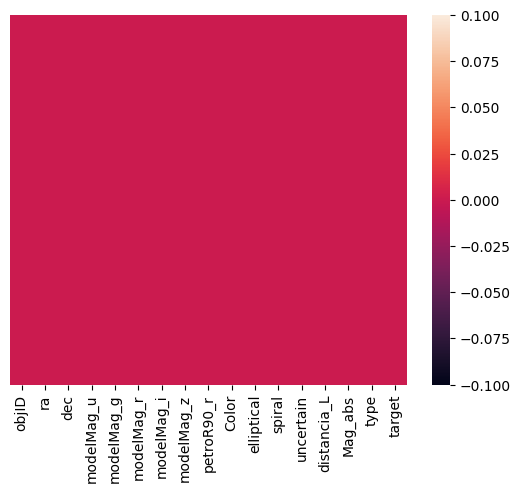

In [11]:
sns.heatmap(data.isna(), yticklabels=False)

Elimino duplicados

In [12]:
data_unique = data.drop_duplicates(subset=["objID"])
# data_unique.head()
data_unique.shape

(18007, 17)

In [13]:
data_unique.describe()

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,Color,elliptical,spiral,uncertain,distancia_L,Mag_abs,target
count,1.800700e+04,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000
mean,1.237661e+18,182.877773,24.731422,18.328490,16.886523,16.264649,15.936868,15.699427,9.464553,-2.063841,0.096074,0.328261,0.575665,111.677474,-18.937537,1.520409
std,6.142531e+12,61.491958,19.161276,0.964005,1.019238,1.107326,1.159965,1.214273,4.808338,0.526015,0.294701,0.469593,0.494255,26.452894,1.184483,0.664647
min,1.237646e+18,0.013448,-11.053294,14.704220,13.110180,12.232180,11.775730,11.492580,0.842248,-4.963964,0.000000,0.000000,0.000000,60.888247,-22.730648,1.000000
25%,1.237657e+18,151.586892,8.509189,17.685560,16.189805,15.485390,15.118200,14.828740,6.188277,-2.537768,0.000000,0.000000,0.000000,89.704330,-19.785564,1.000000
50%,1.237662e+18,184.722102,23.056895,18.422610,17.038430,16.435170,16.110650,15.865950,8.406304,-2.049527,0.000000,0.000000,1.000000,112.237797,-18.858549,1.000000
75%,1.237666e+18,224.087948,39.473257,19.025495,17.700190,17.177755,16.892060,16.697190,11.390630,-1.626739,0.000000,1.000000,1.000000,135.296118,-18.082197,2.000000
max,1.237680e+18,359.921854,69.028369,25.311900,22.376620,22.057280,24.361840,22.826950,39.853800,-0.224642,1.000000,1.000000,1.000000,155.470208,-13.516647,3.000000


<Axes: title={'center': 'Mag_abs'}, xlabel='target'>

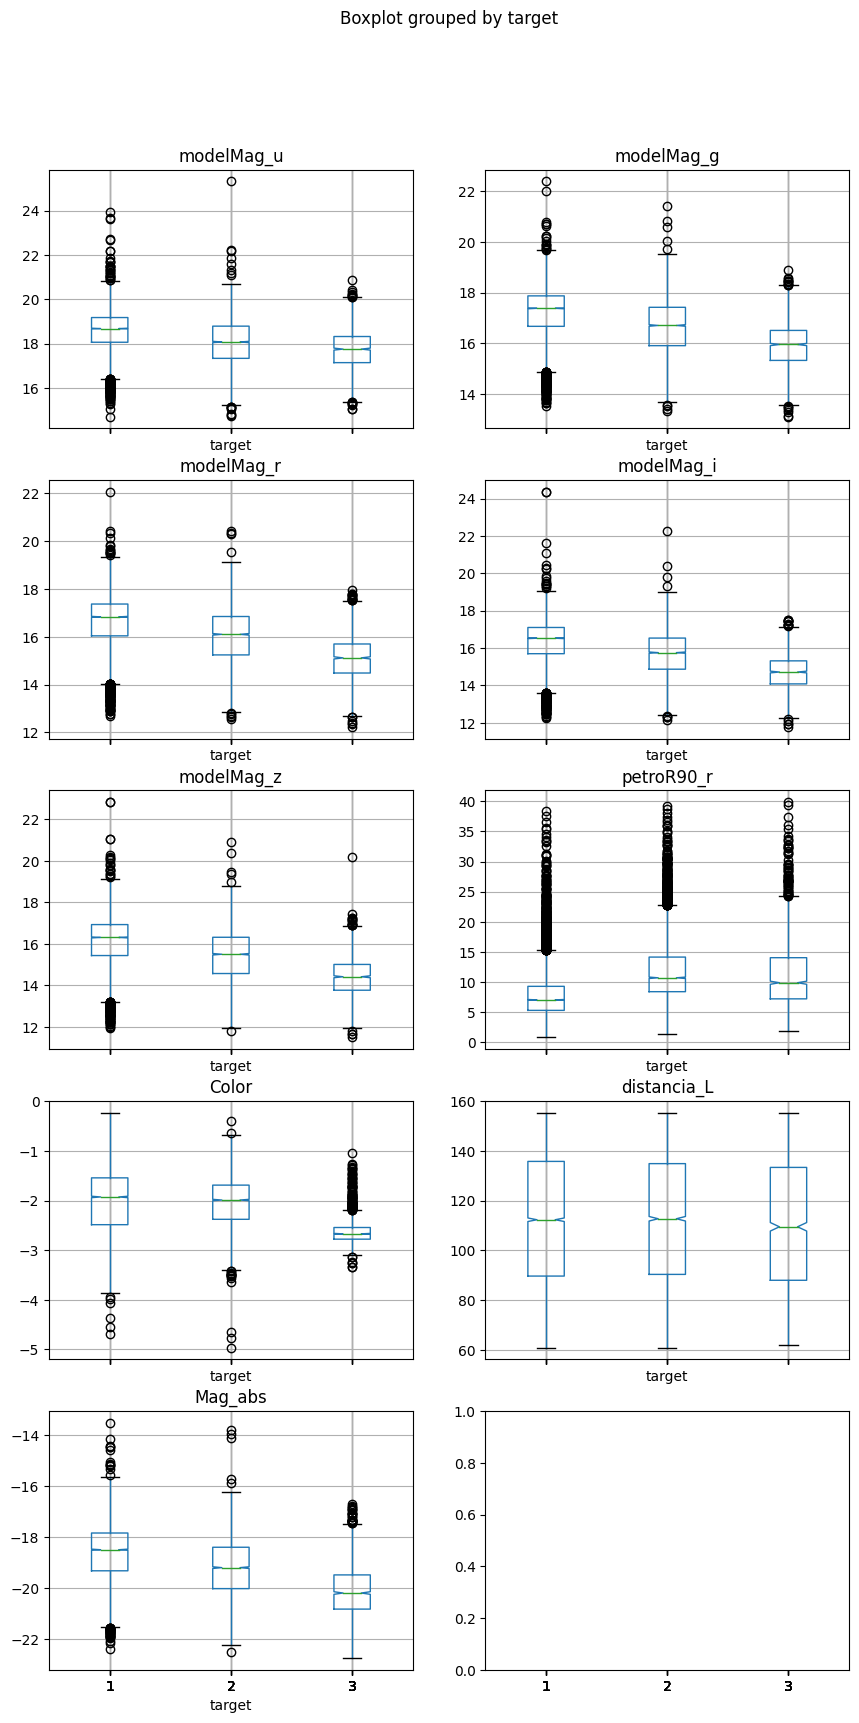

In [14]:
fig, ax = plt.subplots(5, 2,sharex=True, figsize=(10, 20))
data_unique.boxplot('modelMag_u','target',notch=True, ax=ax[0][0])
data_unique.boxplot('modelMag_g','target',notch=True, ax=ax[0][1])
data_unique.boxplot('modelMag_r','target',notch=True, ax=ax[1][0])
data_unique.boxplot('modelMag_i','target',notch=True, ax=ax[1][1])
data_unique.boxplot('modelMag_z','target',notch=True, ax=ax[2][0])
data_unique.boxplot('petroR90_r','target',notch=True, ax=ax[2][1])
# data_unique.boxplot('z','target', notch=True,ax=ax[2][1])
data_unique.boxplot('Color','target',notch=True, ax=ax[3][0])
data_unique.boxplot('distancia_L','target', notch=True,ax=ax[3][1])
data_unique.boxplot('Mag_abs','target',notch=True, ax=ax[4][0])

In [15]:
type_cols      = ['ra','dec','objID','elliptical', 'spiral', 'uncertain', 'type']

# escalar
data_rf      = data_unique.drop(type_cols, axis=1)
# data_clus_cols = data_clus.columns
data_rf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18007 entries, 0 to 32620
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   modelMag_u   18007 non-null  float64
 1   modelMag_g   18007 non-null  float64
 2   modelMag_r   18007 non-null  float64
 3   modelMag_i   18007 non-null  float64
 4   modelMag_z   18007 non-null  float64
 5   petroR90_r   18007 non-null  float64
 6   Color        18007 non-null  float64
 7   distancia_L  18007 non-null  float64
 8   Mag_abs      18007 non-null  float64
 9   target       18007 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.5 MB


In [16]:
# variables = ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroR90_r', 'z', 'Color', 'distancia_L', 'Mag_abs',]
variables = ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroR90_r', 'Color', 'distancia_L', 'Mag_abs', ]

In [17]:

data_rfs = data_rf[variables].copy()
data_rfs

,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,Color,distancia_L,Mag_abs
0,17.36539,15.46586,14.54658,14.07490,13.69937,18.121160,-2.818807,135.131916,-21.191136
1,19.95136,18.35397,17.54043,17.05026,16.71222,3.657189,-2.410933,153.893111,-18.473102
2,17.07165,15.83995,15.33272,15.07332,14.92688,17.837670,-1.738927,84.249297,-19.301402
3,19.79620,17.75608,17.02625,16.65317,16.40043,7.058877,-2.769947,97.626611,-17.957224
4,18.47516,17.39154,16.99343,16.77378,16.65345,7.496475,-1.481728,119.172834,-18.383764
...,...,...,...,...,...,...,...,...,...
32611,18.17586,16.43222,15.67861,15.30980,15.00426,8.011996,-2.497250,108.312366,-19.538411
32614,18.60408,17.45639,17.02447,16.80120,16.60431,6.324440,-1.579605,124.013281,-18.444637
32618,18.28635,16.35437,15.45957,15.04826,14.68787,6.461855,-2.826780,151.586126,-20.534729
32619,19.40030,17.66846,16.84531,16.43551,16.13970,4.905749,-2.554989,142.173048,-18.991187


In [18]:
data_rfs = StandardScaler().fit_transform(data_rfs)
data_rfs

array([[-0.99908976, -1.3938863 , -1.55159015, ..., -1.43529584,
         0.88667399, -1.90265537],
       [ 1.68351365,  1.43978834,  1.15215921, ..., -0.65987011,
         1.59592404,  0.39210957],
       [-1.30380633, -1.02684718, -0.84162622, ...,  0.61770762,
        -1.0368975 , -0.30720186],
       ...,
       [-0.04371501, -0.52212302, -0.72706784, ..., -1.45045364,
         1.50871055, -1.34846821],
       [ 1.11186145,  0.76719889,  0.52439554, ..., -0.93374079,
         1.15285765, -0.04529548],
       [-0.43801872, -0.58710471, -0.64594226, ..., -0.55704884,
         1.27616996, -1.1698944 ]])

In [19]:
data_rfs = pd.DataFrame(data_rfs, columns=variables)
data_rfs

,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,Color,distancia_L,Mag_abs
0,-0.999090,-1.393886,-1.551590,-1.605238,-1.647168,1.800382,-1.435296,0.886674,-1.902655
1,1.683514,1.439788,1.152159,0.959877,0.834097,-1.207803,-0.659870,1.595924,0.392110
2,-1.303806,-1.026847,-0.841626,-0.744481,-0.636239,1.741423,0.617708,-1.036898,-0.307202
3,1.522556,0.853167,0.687803,0.617538,0.577319,-0.500327,-1.342406,-0.531180,0.827652
4,0.152151,0.495498,0.658163,0.721518,0.785696,-0.409317,1.106679,0.283355,0.467535
...,...,...,...,...,...,...,...,...,...
18002,-0.158334,-0.445740,-0.529253,-0.540607,-0.572512,-0.302100,-0.823971,-0.127215,-0.507303
18003,0.285888,0.559126,0.686195,0.745158,0.745226,-0.653074,0.920601,0.466344,0.416143
18004,-0.043715,-0.522123,-0.727068,-0.766086,-0.833078,-0.624495,-1.450454,1.508711,-1.348468
18005,1.111861,0.767199,0.524396,0.429889,0.362592,-0.948130,-0.933741,1.152858,-0.045295


# División en entrenamiento y evaluación
   - Realizar la respectiva división conjunto de *train* y *test*.

A partir de los datos en las variables `X` e `y` separamos en train y en test:

In [20]:
y = data_rf['target']
y

0        3
1        1
2        2
3        1
4        1
        ..
32611    3
32614    1
32618    1
32619    1
32620    2
Name: target, Length: 18007, dtype: int64

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data_rfs, y, train_size=0.8, random_state = 8, stratify = y)

# Radom Forest (RF)

- Seleccione de variables fisicas e implente RF para la clasificación morfologica.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# param_grid = {
# 'n_stimators': [100, 200, 300],
# 'max_depth': [None, 2, 5, 10 ],
# 'min_samples_split': [2, 5, 10],
# 'min_samples_leaf': [1, 2, 4],
# 'max_features': ['sqrt', 'log2'],
# 'class_weight': [None, 'balanced']
# }
# Define the hyperparameter space
param_dist = {
    'n_estimators': randint(10, 200),  # Random integer values between 10 and 200
    'max_depth': randint(5, 50),       # Random integer values between 5 and 50
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': randint(2, 20) # Random integer values between 2 and 20
}

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of iterations for random search
    cv=5,       # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1   # Use all available CPU cores
)

# Fit the RandomizedSearchCV to your data
random_search.fit(x_train, y_train)

# Get the best hyperparameters found during the search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model found during the search
best_model = random_search.best_estimator_

Best Hyperparameters: {'max_depth': 38, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 9, 'n_estimators': 151}


In [24]:
from sklearn import ensemble

In [25]:
# clf = ensemble.RandomForestClassifier(max_depth= 39, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 5, n_estimators= 129)
# clf.fit(x_train, y_train);
# clf = ensemble.RandomForestClassifier(max_depth= 48, max_features= 'log2', min_samples_leaf= 4, min_samples_split= 4, n_estimators= 98)
# clf = ensemble.RandomForestClassifier(max_depth= 48, max_features= 'log2', min_samples_leaf= 8, min_samples_split= 8, n_estimators= 85, class_weight='balanced')
clf = ensemble.RandomForestClassifier(max_depth= 38, max_features= 'log2', min_samples_leaf= 6, min_samples_split= 9, n_estimators= 151, class_weight='balanced')
clf.fit(x_train, y_train);

In [26]:
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.77      0.68      0.72      2074
           2       0.62      0.64      0.63      1182
           3       0.41      0.66      0.50       346

    accuracy                           0.66      3602
   macro avg       0.60      0.66      0.62      3602
weighted avg       0.69      0.66      0.67      3602



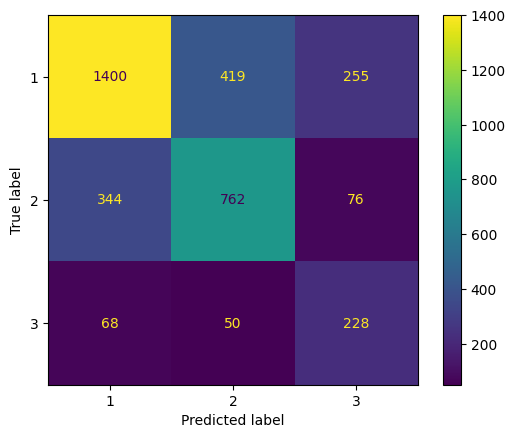

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

##### Enfoque 1: Aplicar Sobremuestreo antes de la División

In [29]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

In [30]:
X = data_rfs

In [31]:
# Supongamos que X es tu conjunto de características y y es tu variable objetivo

# Aplica el sobremuestreo al conjunto completo
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [32]:
# Divide los datos en entrenamiento y prueba
X_train, X_test, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [33]:
param_dist = {
    'n_estimators': randint(10, 200),  # Random integer values between 10 and 200
    'max_depth': randint(5, 50),       # Random integer values between 5 and 50
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': randint(2, 20) # Random integer values between 2 and 20
}

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of iterations for random search
    cv=5,       # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1   # Use all available CPU cores
)

# Fit the RandomizedSearchCV to your data
random_search.fit(X_train, y_train1)

# Get the best hyperparameters found during the search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model found during the search
best_model = random_search.best_estimator_

Best Hyperparameters: {'max_depth': 44, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 39}


In [34]:
# Entrena el clasificador Random Forest
# clf1 = ensemble.RandomForestClassifier(max_depth= 41, max_features= 'sqrt', min_samples_leaf= 3, min_samples_split= 3, n_estimators= 52)
clf1 = ensemble.RandomForestClassifier(max_depth= 44, max_features= 'sqrt', min_samples_leaf= 3, min_samples_split= 9, n_estimators= 39)
clf1.fit(X_train, y_train1);
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)

In [35]:
predictions1 = clf1.predict(X_test)
print(classification_report(y_test1, predictions1))

              precision    recall  f1-score   support

           1       0.84      0.67      0.74      2086
           2       0.79      0.84      0.82      2058
           3       0.87      0.99      0.92      2076

    accuracy                           0.83      6220
   macro avg       0.83      0.83      0.83      6220
weighted avg       0.83      0.83      0.83      6220



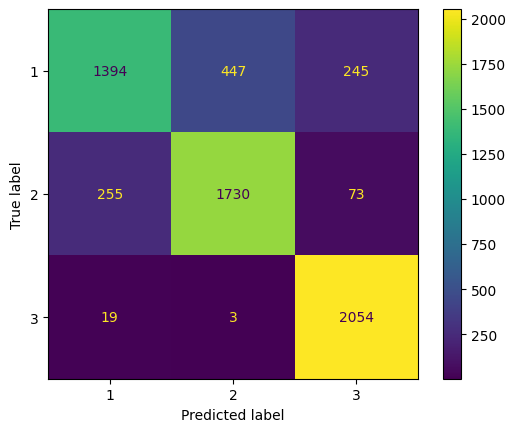

In [36]:
cm1 = confusion_matrix(y_test1, predictions1, labels=clf.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=clf.classes_)
disp1.plot()
plt.show()

##### Enfoque 2: Aplicar Sobremuestreo después de la División

Vuelvo a usar la opcion stratify y class_weight='balanced'

In [37]:
X_train1, X_test1, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [38]:
# Aplica el sobremuestreo solo al conjunto de entrenamiento
# oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train1, y_train2)


In [39]:
param_dist = {
    'n_estimators': randint(10, 200),  # Random integer values between 10 and 200
    'max_depth': randint(5, 50),       # Random integer values between 5 and 50
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': randint(2, 20) # Random integer values between 2 and 20
}

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of iterations for random search
    cv=5,       # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1   # Use all available CPU cores
)

# Fit the RandomizedSearchCV to your data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters found during the search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model found during the search
best_model = random_search.best_estimator_

Best Hyperparameters: {'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 110}


In [41]:
# Entrena el clasificador Random Forest
# clf = RandomForestClassifier()
# clf2 = ensemble.RandomForestClassifier(max_depth= 48, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 4, n_estimators= 42)
# class_weight='balanced'
clf2 = ensemble.RandomForestClassifier(max_depth= 24, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 110, class_weight='balanced')
clf2.fit(X_train_resampled, y_train_resampled);
# clf.fit(X_train_resampled, y_train_resampled)

In [42]:
predictions2 = clf2.predict(X_test1)
print(classification_report(y_test2, predictions2))

              precision    recall  f1-score   support

           1       0.76      0.75      0.75      2074
           2       0.66      0.64      0.65      1182
           3       0.46      0.55      0.50       346

    accuracy                           0.69      3602
   macro avg       0.62      0.64      0.63      3602
weighted avg       0.70      0.69      0.69      3602



In [43]:
# Evalúa el modelo
accuracy = clf.score(X_test1, y_test2)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8092726263187118


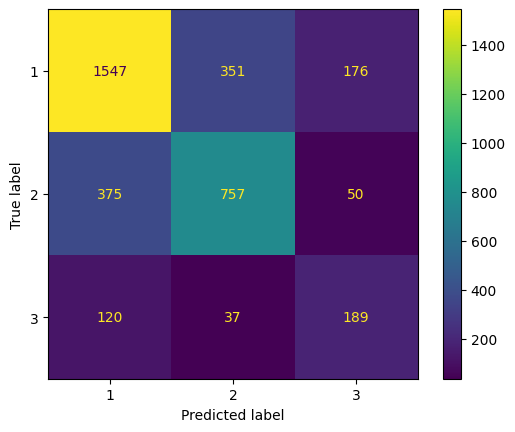

In [44]:
cm2 = confusion_matrix(y_test2, predictions2, labels=clf.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf.classes_)
disp2.plot()
plt.show()

##### SMOTE

Con este modulo uso class_weight='balanced' pero no puedo usar stratify.

In [45]:
from imblearn.over_sampling import SMOTE

In [48]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled1, y_resampled1 = smote.fit_resample(X, y)

In [50]:
X_train2, X_test2, y_train3, y_test3 = train_test_split(X_resampled1, y_resampled1, test_size=0.2, random_state=42)

In [51]:
param_dist = {
    'n_estimators': randint(10, 200),  # Random integer values between 10 and 200
    'max_depth': randint(5, 50),       # Random integer values between 5 and 50
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': randint(2, 20) # Random integer values between 2 and 20
}

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of iterations for random search
    cv=5,       # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1   # Use all available CPU cores
)

# Fit the RandomizedSearchCV to your data
random_search.fit(X_train2, y_train3)

# Get the best hyperparameters found during the search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model found during the search
best_model = random_search.best_estimator_

Best Hyperparameters: {'max_depth': 39, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 146}


In [52]:
clf3 = ensemble.RandomForestClassifier(max_depth= 39, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 8, n_estimators= 146, class_weight='balanced')
clf3.fit(X_train2, y_train3);

In [53]:
predictions3 = clf3.predict(X_test2)
print(classification_report(y_test3, predictions3))

              precision    recall  f1-score   support

           1       0.77      0.64      0.70      2086
           2       0.77      0.80      0.79      2058
           3       0.83      0.94      0.88      2076

    accuracy                           0.79      6220
   macro avg       0.79      0.79      0.79      6220
weighted avg       0.79      0.79      0.79      6220



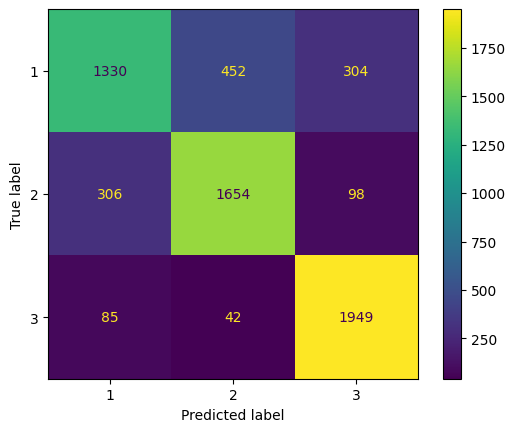

In [54]:
cm3 = confusion_matrix(y_test3, predictions3, labels=clf.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=clf.classes_)
disp3.plot()
plt.show()

In [55]:
from imblearn.under_sampling import RandomUnderSampler

In [56]:
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled2, y_resampled2 = undersampler.fit_resample(X_train, y_train)

In [57]:
X_train3, X_test3, y_train4, y_test4 = train_test_split(X_resampled2, y_resampled2, test_size=0.2, random_state=42)

In [58]:
param_dist = {
    'n_estimators': randint(10, 200),  # Random integer values between 10 and 200
    'max_depth': randint(5, 50),       # Random integer values between 5 and 50
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': randint(2, 20) # Random integer values between 2 and 20
}

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of iterations for random search
    cv=5,       # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1   # Use all available CPU cores
)

# Fit the RandomizedSearchCV to your data
random_search.fit(X_train3, y_train4)

# Get the best hyperparameters found during the search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model found during the search
best_model = random_search.best_estimator_

Best Hyperparameters: {'max_depth': 39, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 8, 'n_estimators': 57}


In [59]:
clf4 = ensemble.RandomForestClassifier(max_depth= 39, max_features= 'log2', min_samples_leaf= 9, min_samples_split= 8, n_estimators= 57, class_weight='balanced')
clf4.fit(X_train3, y_train4);

In [60]:
predictions4 = clf4.predict(X_test3)
print(classification_report(y_test4, predictions4))

              precision    recall  f1-score   support

           1       0.36      0.36      0.36       303
           2       0.35      0.38      0.36       270
           3       0.26      0.25      0.26       258

    accuracy                           0.33       831
   macro avg       0.33      0.33      0.33       831
weighted avg       0.33      0.33      0.33       831



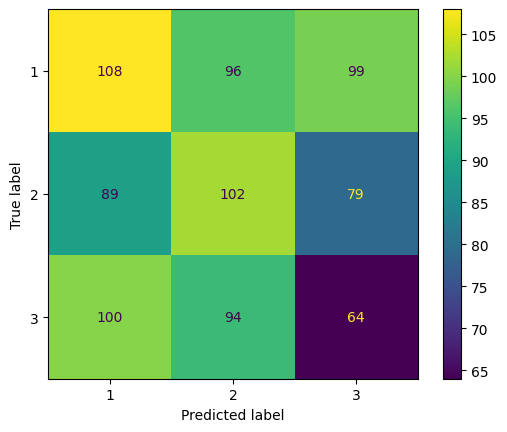

In [62]:
cm4 = confusion_matrix(y_test4, predictions4, labels=clf.classes_)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=clf.classes_)
disp4.plot()
plt.show()

In [ ]:
RandomForestClassifier?

# Neural Networks

Entrene una red neuronal convolucional sobre el conjunto de imágenes.

# Conclusiones